In [1]:
# use kernel py3-6
#import goatools
#from goatools import obo_parser
import re
import json
import numpy as np
import pandas as pd
#from goatools.go_enrichment import GOEnrichmentStudy
import matplotlib.pyplot as plt
import os

In [2]:
with open("/home/t44p/PW_rawdata/results/full_lasso/gcms/citric_acid_273_375_rt9_72_nXcv.json", 'r') as file:
    citric_acid_273_375_rt9_72_nXcv2 = json.load(file)

In [3]:
all2_means = citric_acid_273_375_rt9_72_nXcv2['mean_scores']

In [4]:
citric_acid_273_375_rt9_72_nXcv2['scores'].keys()

dict_keys(['42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52'])

In [5]:
"""all_fold_scores = []
for item, values in citric_acid_273_375_rt9_72_nXcv['scores'].items():
    print(values['fold_scores'])
    all_fold_scores.extend(values['fold_scores'])
print(all_fold_scores)"""

"all_fold_scores = []\nfor item, values in citric_acid_273_375_rt9_72_nXcv['scores'].items():\n    print(values['fold_scores'])\n    all_fold_scores.extend(values['fold_scores'])\nprint(all_fold_scores)"

In [2]:

path_gc = "/home/t44p/PW_rawdata/results/full_lasso/gcms/"
path_lc ="/home/t44p/PW_rawdata/results/full_lasso/lcms/"
lasso_results = {}


# Iterate over each file in the directory
for p in [path_gc, path_lc]:

    for file in os.listdir(p):
        if file.endswith(".json") and not(file.startswith('gcms_dict_nXcv') or file.startswith('lcms_dict_nXcv')):
            file_path = os.path.join(p, file)
            with open(file_path, 'r') as json_file:
                data = json.load(json_file)
            
            # Extract mean scores and fold scores
            print(file)
            
                
            all_means = data['mean_scores']
            all_fold_scores = []
            for item, values in data['scores'].items():
                all_fold_scores.extend(values['fold_scores'])

            # Use file name without extension as the key
            file_name = os.path.splitext(file)[0]
            lasso_results[file_name] = {
                'all_mean_scores': all_means,
                'mean_10x': np.mean(all_means),
                'all_fold_scores': all_fold_scores
            }



Cellobiose_361_204_rt14_40_nXcv.json
tyrosine_218_280_rt10_78_nXcv.json
threonic_acid_292_220_rt7_49_nXcv.json
isoleucin_158_233_rt_5_21_nXcv.json
asparagine_116_188_rt9_00_nXcv.json
adenine_264_279_rt11_12_nXcv.json
glycerol_117_205_rt4_75_nXcv.json
raffinose_437_451_rt16_91_nXcv.json
adenosine_5_monophosphate_169__nXcv.json
ornithine_142_174_rt9_34_nXcv.json
glucose_160_rt9_81_nXcv.json
inositol_myo_305_265_rt10_71_nXcv.json
phosphoric_acid_314_299_rt_5_4_nXcv.json
sucrose_437_361_rt13_77_nXcv.json
hexose_307_217_rt9_58_nXcv.json
alanine_3_cyano_141_100_rt6_78_nXcv.json
threonine_219_291_rt6_01_nXcv.json
tryptophan_202_291_rt12_94_nXcv.json
citric_acid_273_375_rt9_72_nXcv.json
alanine_116_218_rt3_38_nXcv.json
glucose_1_phosphate_217_rt9_16_nXcv.json
leucine_158_232_rt4_97_nXcv.json
trehalose_alpha_alpha_191_169__nXcv.json
quinic_acid_255_345_rt9_45_nXcv.json
Oxalic_acid_219_147_3_94_nXcv.json
valine_144_218_rt4_42_nXcv.json
dopamine_174_426_rt11_11_nXcv.json
galactinol_204_191_rt15_3

In [3]:
len(lasso_results.keys())

243

## Distribution of foldscore variance

shows how many models have e.g. 0.4 to 0.45

In [4]:
variances = []
variances = [np.var(target_data['all_fold_scores']) for target_data in lasso_results.values()]

In [8]:
variances

[0.08761048338517743,
 0.11292121283295385,
 0.013223378776568673,
 0.04168952594831035,
 0.02497033043580781,
 0.44667196737679643,
 0.11344661372048959,
 0.011080556764760533,
 0.055894329476127214,
 0.055360553111170184,
 0.11030683664168542,
 0.08085734842713142,
 0.09301933583351944,
 0.10787922069859,
 0.10440111912347091,
 0.03680733893694937,
 0.04104380625730578,
 0.9113190424694819,
 0.058252694066255495,
 0.02480963457553162,
 0.034005336457179736,
 0.030985896165320242,
 0.26295446362584646,
 0.10588509073696842,
 1.165739296063454,
 0.03677205349926377,
 0.49419093269789544,
 0.11379555849310395,
 0.49752913475618876,
 0.13780940206199438,
 4.689657613703287,
 0.16431464874149215,
 0.11468017552011632,
 0.04578573132777908,
 0.082352846581453,
 0.26225282947392786,
 0.1297444419203463,
 2.245941315511194,
 0.7373934353998832,
 0.010013390388452944,
 0.07286983287515666,
 0.0074354269466535075,
 0.19972082026522253,
 0.01683412187588044,
 0.11366151195260107,
 0.13790802640

bins [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35
 1.4  1.45 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95 2.  ], average bin size 0.05


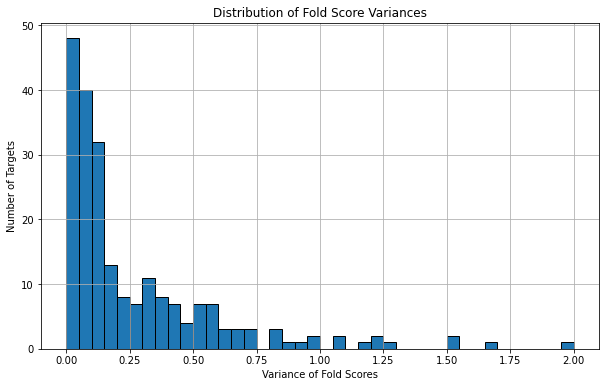

In [5]:


# Plotting the histogram
plt.figure(figsize=(10, 6))
bins=np.arange(0, 2.05, 0.05)
bin_sizes = np.diff(bins)
print(f"bins {bins}, average bin size {np.mean(bin_sizes)}")
plt.hist(variances, bins=bins, edgecolor='black')
plt.title('Distribution of Fold Score Variances')
plt.xlabel('Variance of Fold Scores')
plt.ylabel('Number of Targets')
plt.grid(True)
plt.show()


#### variance plot now we know that there are variances bigger than 100 & 6000

use auto binning 

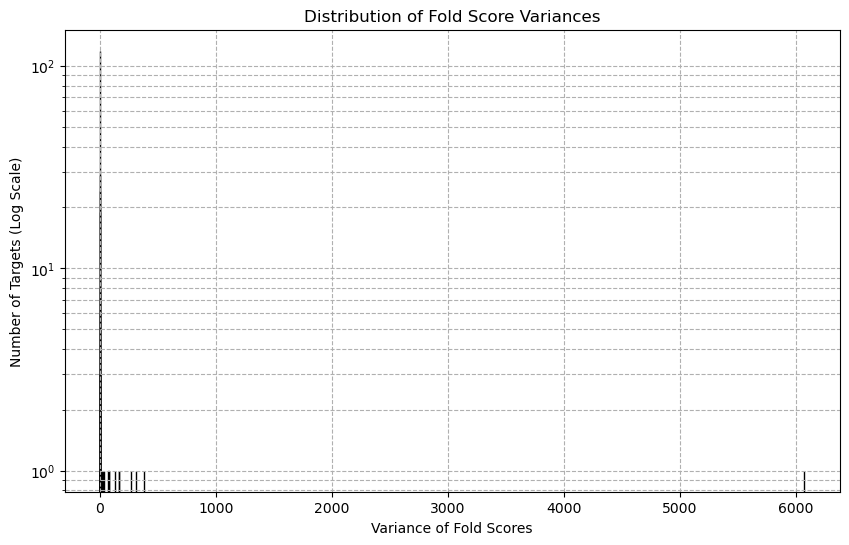

In [9]:
# Calculate the variances of fold scores for each target
variances = [np.var(target_data['all_fold_scores']) for target_data in lasso_results.values()]

# Since we have variances that are very high, we will use a logarithmic scale on the y-axis.
# We also use a wider range of bins to capture the high variance values.

# Find the maximum variance to define the end of the bin range
max_variance = max(variances)

# Define the number of bins or use 'auto' for automatic binning
num_bins = 'auto'  # You can also specify an integer for a fixed number of bins

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(variances, bins=num_bins, edgecolor='black', log=True)  # Note the log=True parameter
plt.title('Distribution of Fold Score Variances')
plt.xlabel('Variance of Fold Scores')
plt.ylabel('Number of Targets (Log Scale)')
plt.grid(True, which="both", ls="--")  # Grid for both major and minor ticks
plt.show()


### Variance, check variance greater than 2, and up to the 6k something 

variance is estimated corrextly there are alot OKish performing but especially a few very bad. 


In [19]:
c = 0
print(max(variances))
print(f"target\t score variance across 10 runs\t min score\tmax score")
for item, target_data in lasso_results.items():
    np.var(target_data['all_fold_scores'])
    if np.var(target_data['all_fold_scores']) > 2:
        print(f"{item}\t{np.var(target_data['all_fold_scores'])}\t{min(target_data['all_fold_scores'])}\t{max(target_data['all_fold_scores'])} ")# {max(target_data['all_fold_scores'])}
        c += 1
print(c)

6074.423466047853
target	 score variance across 10 runs	 min score	max score
dehydroascorbic_acid_316_173_r_nXcv	4.689657613703287	-12.566253440092236	0.14148065119001463 
ethanolamine_174_rt4_63_nXcv	2.245941315511194	-8.234692315589099	0.041883075915339685 
Coumaroyl_quinic_acid__nXcv	75.3911877574632	-50.64611694745887	0.42098435050990135 
_933_4699157_8_265868462_nXcv	18.584348008904872	-20.66851120978049	0.13779653337318953 
Dehydro_Ascorbic_acid_L_nXcv	6074.423466047853	-444.7792860163526	-0.0017395655906558005 
_1_3_Dicaffeoylquinic_acid__nXcv	2.4790421644712075	-8.9232737295466	0.5002144384363597 
Phenolic_glycoside__nXcv	6.497441834713449	-13.50810793822149	0.16297558675527313 
Saponin_9_18_nXcv	3.8756293513760838	-11.746397721311371	0.12306988680776898 
_3_5_dicaffeoul_quinic_acid_L_nXcv	11.32260053572057	-19.69728777407677	0.43073242728940775 
Flavonoid_glycoside__nXcv	14.574447429527623	-22.437262320015922	0.3960529692477729 
Triterpene_8_21_nXcv	381.7293745452334	-114.9737

In [ ]:
[lasso_results[target_data]['mean_10x'] for target_data in lasso_results.keys()]

[0.3508442710335274,
 0.08349998679351965,
 0.7354872382737536,
 0.13551377837277065,
 -0.09676782444151706,
 -0.7169357476263346,
 -0.00032153781807132335,
 0.7726347578255037,
 0.41338952596367784,
 -0.23094321900074988,
 0.4038772690045627,
 0.06887431979605976,
 -0.13680935177717643,
 0.3378736727579361,
 0.26053976995137135,
 0.20335379803903245,
 0.045614930069390776,
 -0.1441353958429078,
 0.299572179518963,
 0.5041546339774128,
 0.4737243060710512,
 0.422776767341394,
 -0.009724005601519918,
 0.07257203083003823,
 -1.1336052618668317,
 0.4412489494712444,
 0.16292473867268462,
 0.12586901634487166,
 -0.139100233922365,
 -0.2201936618413959,
 -1.0359512849643198,
 -0.31322634873233235,
 0.20475378127384927,
 -0.13729699116232194,
 -0.12610079899731255,
 -0.19094873059246115,
 0.3409811806518983,
 -0.766929712979972,
 -0.7530792166558505,
 0.7159047010377437,
 0.14772441244721285,
 0.7500806239379816,
 -0.07042852246754862,
 -0.1465794557335932,
 -0.1437560695849751,
 -0.33375823

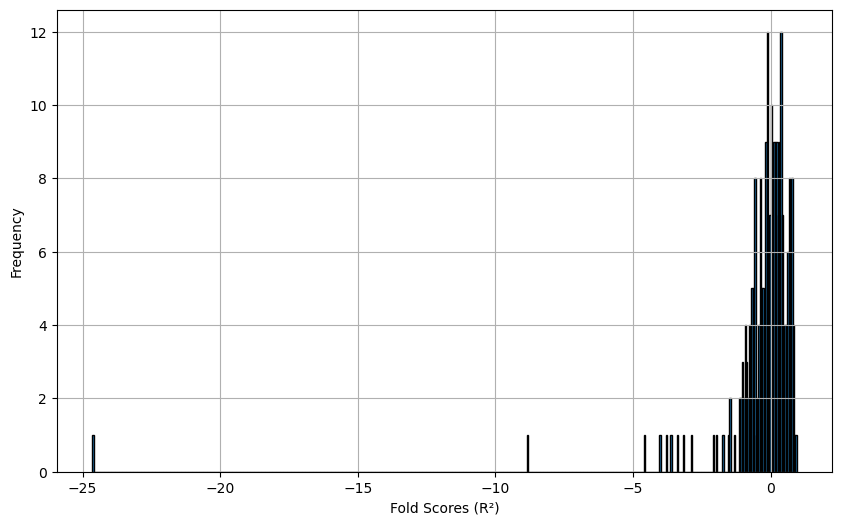

In [8]:

# Flatten all fold scores into a single list

#all_fold_scores = [score for target_data in lasso_results.values() for score in target_data['all_mean_scores']]
all_mean_scores = [lasso_results[target_data]['mean_10x'] for target_data in lasso_results.keys()]

# Find the minimum and maximum fold scores
min_score = min(all_mean_scores)
max_score = max(all_mean_scores)

# Round these to the nearest appropriate bin edge
bin_start = np.floor(min_score / 0.05) * 0.05  # Adjust 0.05 if you prefer a different bin width
bin_end = np.ceil(max_score / 0.05) * 0.05

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(all_mean_scores, bins=np.arange(bin_start, bin_end + 0.05, 0.05), edgecolor='black')
#plt.title('Distribution of Fold Scores')
plt.xlabel('Fold Scores (R²)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
plt.show()

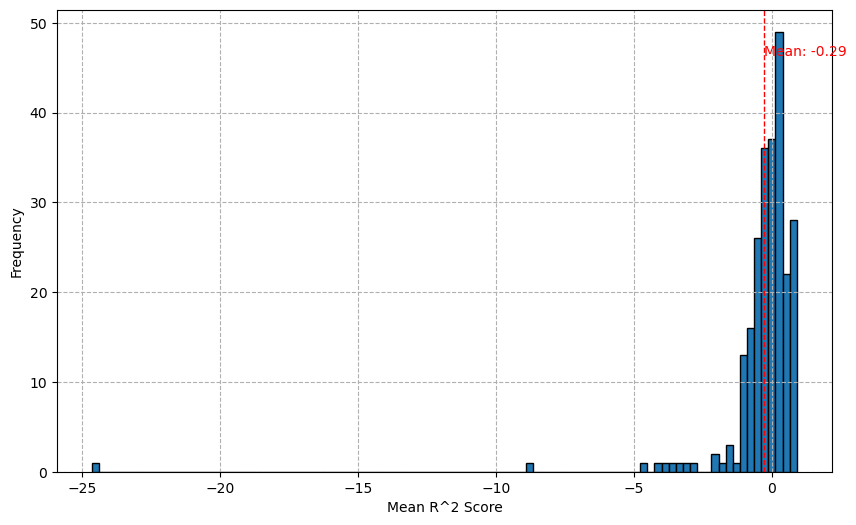

In [9]:
plt.figure(figsize=(10, 6))

# Logarithmic scale for x-axis
all_mean_scores = [lasso_results[target_data]['mean_10x'] for target_data in lasso_results.keys()]

bin_edges = np.histogram_bin_edges(all_mean_scores, bins='auto')
plt.hist(all_mean_scores, bins=bin_edges, edgecolor='black')#, log=True)

plt.xlabel('Mean R^2 Score')
plt.ylabel('Frequency')
#plt.title('Distribution of Mean \( R^2 \) Scores Across Targets')
plt.grid(True, which="both", ls="--")  # Grid for both major and minor ticks

# Annotation for mean or median
mean_score = np.mean(all_mean_scores)
plt.axvline(mean_score, color='red', linestyle='dashed', linewidth=1)
plt.text(mean_score, plt.gca().get_ylim()[1]*0.9, f'Mean: {mean_score:.2f}', color = 'red')

plt.show()


In [43]:
np.mean(all_mean_scores)
#bin_edges

-0.2875103815164638

Bin sizes: [0.25799701 0.25799701 0.25799701 0.25799701 0.25799701 0.25799701
 0.25799701 0.25799701 0.25799701 0.25799701 0.25799701 0.25799701
 0.25799701 0.25799701 0.25799701 0.25799701 0.25799701 0.25799701
 0.25799701 0.25799701 0.25799701 0.25799701 0.25799701 0.25799701
 0.25799701 0.25799701 0.25799701 0.25799701 0.25799701 0.25799701
 0.25799701 0.25799701 0.25799701 0.25799701 0.25799701 0.25799701
 0.25799701 0.25799701 0.25799701 0.25799701 0.25799701 0.25799701
 0.25799701 0.25799701 0.25799701 0.25799701 0.25799701 0.25799701
 0.25799701 0.25799701 0.25799701 0.25799701 0.25799701 0.25799701
 0.25799701 0.25799701 0.25799701 0.25799701 0.25799701 0.25799701
 0.25799701 0.25799701 0.25799701 0.25799701 0.25799701 0.25799701
 0.25799701 0.25799701 0.25799701 0.25799701 0.25799701 0.25799701
 0.25799701 0.25799701 0.25799701 0.25799701 0.25799701 0.25799701
 0.25799701 0.25799701 0.25799701 0.25799701 0.25799701 0.25799701
 0.25799701 0.25799701 0.25799701 0.25799701 0.2579

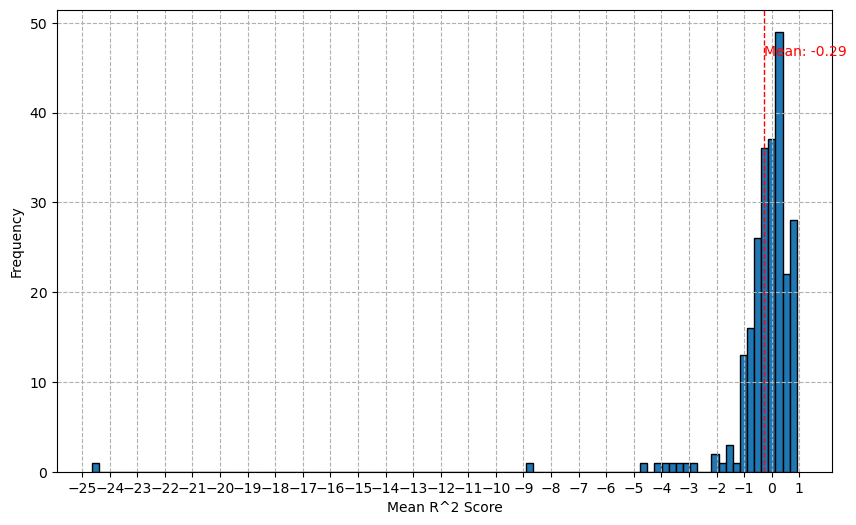

In [32]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

all_mean_scores = [lasso_results[target_data]['mean_10x'] for target_data in lasso_results.keys()]
mean_score = np.mean(all_mean_scores)

bin_edges = np.histogram_bin_edges(all_mean_scores, bins='auto')
bin_sizes = np.diff(bin_edges)  # Calculate the bin sizes
print("Bin sizes:", bin_sizes)
average_bin_size = np.mean(bin_sizes)
print("Average bin size:", average_bin_size)
plt.hist(all_mean_scores, bins=bin_edges, edgecolor='black')

# Set the x-axis label
plt.xlabel('Mean R^2 Score')

# Set the y-axis label
plt.ylabel('Frequency')

# Set x-axis ticks
xticks_major = np.arange(-25, max(all_mean_scores) + 1, 1)
plt.xticks(xticks_major)

# Draw a vertical line for the mean score
plt.axvline(mean_score, color='red', linestyle='dashed', linewidth=1)

# Annotate the mean score
plt.text(mean_score, plt.gca().get_ylim()[1]*0.9, f'Mean: {mean_score:.2f}', color = 'red')

# Add grid lines
plt.grid(True, which="both", ls="--")  # Grid for both major and minor ticks

# Display the plot
plt.show()


In [31]:
print(bin_edges[0] - bin_edges[1])
print(bin_edges[1] - bin_edges[2])
print(bin_edges[2] - bin_edges[3])
print(bin_edges[11] - bin_edges[12])


print(f"{len(bin_edges)/len(all_fold_scores)}")

-0.25799701280270426
-0.25799701280270426
-0.2579970128027007
-0.25799701280270426
3.0303030303030303


BINNING

Choosing bin sizes for a histogram representing coefficient of determination (\( R^2 \)) values from machine learning results depends on several factors, including the range of your data, the level of detail you want to capture, and the interpretability of the results. The coefficient of determination typically ranges from 0 to 1, where 1 indicates perfect prediction and 0 indicates that the model explains none of the variability of the response data around its mean.

For your case, using categorical bins like "good performing" (0.9999 - 0.4), "mediocre" (0.4 - 0.1), and "bad" (0 - -∞) could be a good approach if you want to emphasize the performance categories of your models. However, this approach has some considerations:

1. **Interpretability:** Categorical bins like "good", "mediocre", and "bad" provide an intuitive understanding of model performance. This can be useful for non-technical stakeholders or for a high-level overview.

2. **Detail Loss:** By categorizing into broad groups, you might lose some detail about the distribution within each category. For instance, a model with an \( R^2 \) of 0.399 is quite different from one with 0.101, yet both would be categorized as "mediocre".

3. **Negative Values:** The coefficient of determination usually ranges from 0 to 1. Negative values of \( R^2 \) are possible but indicate that the model is worse than a simple mean model. If you have negative values, it might be important to investigate why your models are performing so poorly.

4. **Custom Bin Sizes:** Alternatively, you could use more granular bins based on the actual distribution of your data. For example, bins of width 0.1 or 0.05 might provide a more detailed view of the distribution of your \( R^2 \) values.

Based on your preferences and the specific nature of your data, you can choose either the categorical approach or a more granular binning strategy. If you provide the data, I can create a histogram that aligns with your chosen approach.

### exclude targets with mean R² lt -1

In [20]:
c = 0
# exclude models that are worse than -1
all_mean_scores = [lasso_results[target_data]['mean_10x'] for target_data in lasso_results if lasso_results[target_data]['mean_10x'] > -1]
for target_data in lasso_results:
    if lasso_results[target_data]['mean_10x'] <= -1:
        print(f"{target_data} with mean score\t{round(lasso_results[target_data]['mean_10x'], 3)}")
        c += 1
print(c)


Oxalic_acid_219_147_3_94_nXcv with mean score	-1.134
dehydroascorbic_acid_316_173_r_nXcv with mean score	-1.036
Coumaroyl_quinic_acid__nXcv with mean score	-1.734
_933_4699157_8_265868462_nXcv with mean score	-1.96
Dehydro_Ascorbic_acid_L_nXcv with mean score	-24.633
Phenolic_glycoside__nXcv with mean score	-1.338
Triterpene_8_21_nXcv with mean score	-4.582
Pyroglutamic_acid_3_L_nXcv with mean score	-1.513
Kaempferol_7_3G_glucosylgentio_nXcv with mean score	-1.064
_931_4518066_8_63280459_nXcv with mean score	-1.046
_D_Glycero_alpha_D_Manno_Hepto_nXcv with mean score	-3.794
_1241_580464_8_916526509_nXcv with mean score	-1.083
Saponin_10_67780171_nXcv with mean score	-1.462
Prolylglycine_L_nXcv with mean score	-3.362
_1313_601235_9_01121774_nXcv with mean score	-3.192
Saponin_8_8_nXcv with mean score	-2.085
Triterpene_8_14_nXcv with mean score	-4.035
Tartaric_acid_L_nXcv with mean score	-1.462
_1063_529871_9_415000766_nXcv with mean score	-8.815
Saponin_10_182_nXcv with mean score	-3.624

Bin sizes: [0.20728191 0.20728191 0.20728191 0.20728191 0.20728191 0.20728191
 0.20728191 0.20728191 0.20728191]
Average bin size: 0.2072819127795685


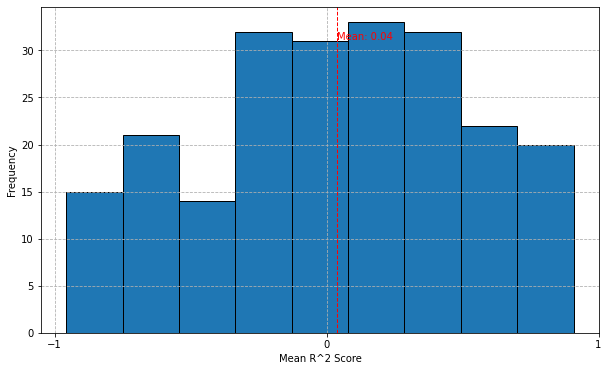

In [15]:
mean_score = np.mean(all_mean_scores)
plt.figure(figsize=(10, 6))
bin_edges = np.histogram_bin_edges(all_mean_scores, bins='auto')
bin_sizes = np.diff(bin_edges)  # Calculate the bin sizes
print("Bin sizes:", bin_sizes)
average_bin_size = np.mean(bin_sizes)
print("Average bin size:", average_bin_size)
plt.hist(all_mean_scores, bins=bin_edges, edgecolor='black')

# Set the x-axis label
plt.xlabel('Mean R^2 Score')

# Set the y-axis label
plt.ylabel('Frequency')

# Set x-axis ticks
xticks_major = np.arange(-1, max(all_mean_scores) + 1, 1)
plt.xticks(xticks_major)

# Draw a vertical line for the mean score
plt.axvline(mean_score, color='red', linestyle='dashed', linewidth=1)

# Annotate the mean score
plt.text(mean_score, plt.gca().get_ylim()[1]*0.9, f'Mean: {mean_score:.2f}', color = 'red')

# Add grid lines
plt.grid(True, which="both", ls="--")  # Grid for both major and minor ticks

# Display the plot
plt.show()


# Orphan Genes


In [17]:
gff_file= pd.read_csv('/home/t44p/PW_rawdata/Transciptome_GenomeAnnotation/Xele_annotated2_gff_export2.gff', sep='\t')
gff = gff_file.iloc[1:,:].copy()
gff.head().iloc[:,8]
mask = gff.iloc[:, 8].str.contains('Description=---NA---')
filtered_gff = gff[mask]

In [18]:
filtered_gff.shape

(4333, 9)

In [66]:

orphans = list(filtered_gff.iloc[:,0])
"""with open('/home/t44p/PW_rawdata/results/full_lasso/orphan.txt', "w") as file:
    # Iterate over the list
    for item in orphans:
        # Write each item to the file, followed by a newline
        file.write(item + "\n")"""
len(orphans)

4333

In [20]:
orphans_set = set(orphans)


In [25]:

path_gc = "/home/t44p/PW_rawdata/results/full_lasso/gcms/"
lasso_results = {}

met_orpha = {}
# Iterate over each file in the directory
for p in [path_gc]:

    for file in os.listdir(p):
        if file.endswith(".json") and not(file.startswith('gcms_dict_nXcv') or file.startswith('lcms_dict_nXcv')):
            file_path = os.path.join(p, file)
            with open(file_path, 'r') as json_file:
                data = json.load(json_file)
            
            # Extract mean scores and fold scores
            print(file.replace('_nXcv.json', ''))
            #print(f"sel feaute {type(data['selected_features'][:10])}")
            feat_set = set(data['selected_features'])
            intersection = feat_set.intersection(orphans_set)
            met_orpha[file.replace('_nXcv.json', '')] = list(intersection)
            #print(len(intersection))

gcms_orph = met_orpha.copy()

#goea_results_to_file(res_dict, path='./lasso_models/10xKfold_lasso_output/goea/', to_excel=True)


Cellobiose_361_204_rt14_40
tyrosine_218_280_rt10_78
threonic_acid_292_220_rt7_49
isoleucin_158_233_rt_5_21
asparagine_116_188_rt9_00
adenine_264_279_rt11_12
glycerol_117_205_rt4_75
raffinose_437_451_rt16_91
adenosine_5_monophosphate_169_
ornithine_142_174_rt9_34
glucose_160_rt9_81
inositol_myo_305_265_rt10_71
phosphoric_acid_314_299_rt_5_4
sucrose_437_361_rt13_77
hexose_307_217_rt9_58
alanine_3_cyano_141_100_rt6_78
threonine_219_291_rt6_01
tryptophan_202_291_rt12_94
citric_acid_273_375_rt9_72
alanine_116_218_rt3_38
glucose_1_phosphate_217_rt9_16
leucine_158_232_rt4_97
trehalose_alpha_alpha_191_169_
quinic_acid_255_345_rt9_45
Oxalic_acid_219_147_3_94
valine_144_218_rt4_42
dopamine_174_426_rt11_11
galactinol_204_191_rt15_38
Ribulose_5_phosphate_357_299_1
pantethaine_4_03_220_235
dehydroascorbic_acid_316_173_r
pyridine_2_hydroxy_152_167_rt3
fructose_307_217_rt9_48
nicotinic_acid_180_136_rt6_32
arginine_157_256_rt9_92
beta_Sitosterol_1TMS_129_18_44
glucose_160_319_rt9_68
ethanolamine_174_r

# GC MS grouping and orphan genes

In [53]:


# Define the categories
categories = {
    "Sugars_Carbohydrates": [
        "Cellobiose_361_204_rt14_40", 
        "raffinose_437_451_rt16_91", 
        "glucose_160_rt9_81", 
        "inositol_myo_305_265_rt10_71", 
        "sucrose_437_361_rt13_77", 
        "hexose_307_217_rt9_58", 
        "glucose_1_phosphate_217_rt9_16", 
        "trehalose_alpha_alpha_191_169_", 
        "fructose_307_217_rt9_48", 
        "glucose_160_319_rt9_68", 
        "galactinol_204_191_rt15_38", 
        "Ribulose_5_phosphate_357_299_1", 
        "glucose_6_phosphate_160_387_rt", 
        "Cellobiose_361_204_or_maltose_", 
        "_6_phospho_gluconate"
    ],
    "Amino_Acids_and_Derivatives": [
        "tyrosine_218_280_rt10_78",
        "serine_204_218_rt5_84", 
        "isoleucin_158_233_rt_5_21", 
        "asparagine_116_188_rt9_00", 
        "ornithine_142_174_rt9_34", 
        "alanine_3_cyano_141_100_rt6_78",
        "arginine_157_256_rt9_92", 
        "threonine_219_291_rt6_01", 
        "tryptophan_202_291_rt12_94", 
        "alanine_116_218_rt3_38", 
        "leucine_158_232_rt4_97", 
        "valine_144_218_rt4_42", 
        "asparagine_188_216_rt7_84", 
        "methionine_176_128_rt7_76", 
        "asparagine_188_216_rt7_45", 
        "lysine_156_174_rt10_07", 
        "glycine_102_147_rt3_70", 
        "aspartic_acid_232_218_rt7_48", 
        "histidine_154_254_rt11_10", 
        "glutamine_156_245_rt9_80", 
        "glycine_174_248_rt_5_31", 
        "homoserine_218_128_rt6_64", 
        "proline_142_130_rt_5_53", 
        "alanine_beta_248_290_rt6_44", 
        "ornithine_142_348_rt8_03"
    ],
    "Nucleotides_and_Derivatives": [
        "adenine_264_279_rt11_12", 
        "adenosine_5_monophosphate_169_"
    ],
    "Organic_Acids": [
        "threonic_acid_292_220_rt7_49", 
        "citric_acid_273_375_rt9_72", 
        "quinic_acid_255_345_rt9_45", 
        "Oxalic_acid_219_147_3_94", 
        "dehydroascorbic_acid_316_173_r", 
        "erythronic_acid_292_rt7_24", 
        "pyroglutamic_acid_156_258_rt8_", 
        "nonanoic_acid_117_215_rt6_19", 
        "malic_acid_233_245_rt7_22", 
        "glyceric_acid_292_189_rt5_63", 
        "butyric_acid_4_amino_174_304_r", 
        "quinic_acid_3_caffeoyl_trans_3", 
        "galactonic_acid_1_4_lacton_217"
    ],
    "Amines_Amides": [
        "dopamine_174_426_rt11_11", 
        "ethanolamine_174_rt4_63", 
        "guanidine_146_171_rt4_33"
    ],
    "Vitamins_and_Cofactors": [
        "nicotinic_acid_180_136_rt6_32", 
        "pantethaine_4_03_220_235"
    ],
    "Sterols": [
        "beta_Sitosterol_1TMS_129_18_44"
    ],
    "Others": [
        "phosphoric_acid_314_299_rt_5_4",
        "glycerol_117_205_rt4_75",
        "pyridine_2_hydroxy_152_167_rt3", 
        "inositol_1_phosphate_myo_299_3", 
        "urea_189_204_rt5_56", 
        "glycerol_3_phosphate_357_445_r", 
        "Hydroxylamine_133_3_07_No_need", 
        "glutamic_acid_246_363_rt8_31"
    ]
}


In [58]:

path_gc = "/home/t44p/PW_rawdata/results/full_lasso/gcms/"
lasso_results = {}
met_orpha = {}


# Function to process files and create Excel sheets
def process_files_for_category(category, metabolites, orphans, path, outpath):
    excel_writer = pd.ExcelWriter(f'{outpath}{category}.xlsx', engine='xlsxwriter')

    print(category)
    for m in metabolites:
        print(os.path.join(path, f"{m}_nXcv.json"))
        file_path = os.path.join(path, f"{m}_nXcv.json")
        with open(file_path, 'r') as json_file:
            data = json.load(json_file)
        feat_set = set(data['selected_features'])
        intersection = feat_set.intersection(set(orphans))
        #met_orpha[file.replace('_nXcv.json', '')] = list(intersection)

        
        if intersection:
            # Create DataFrame for orphan genes
            df_orphans = pd.DataFrame(list(intersection), columns=['orphan_genes'])
            # Create DataFrame for selected features
            df_features = pd.DataFrame(list(feat_set), columns=['selected_features'])
            # Combine dataframes
            df_combined = pd.merge(df_orphans, df_features, how='outer', left_index=True, right_index=True)
            df_combined.to_excel(excel_writer, sheet_name=m, index=False)
        else:
            df = pd.DataFrame(list(data['selected_features']), columns=['selected_features'])
            df.to_excel(excel_writer, sheet_name=m, index=False)

    excel_writer.save()


In [59]:

# Iterate over each category and process files
for category, metabolites in categories.items():
    process_files_for_category(category, metabolites, orphans=orphans_set, path=path_gc, outpath = '/home/t44p/PW_rawdata/results/full_lasso/gcms/excel/')

Sugars_Carbohydrates
/home/t44p/PW_rawdata/results/full_lasso/gcms/Cellobiose_361_204_rt14_40_nXcv.json
/home/t44p/PW_rawdata/results/full_lasso/gcms/raffinose_437_451_rt16_91_nXcv.json
/home/t44p/PW_rawdata/results/full_lasso/gcms/glucose_160_rt9_81_nXcv.json
/home/t44p/PW_rawdata/results/full_lasso/gcms/inositol_myo_305_265_rt10_71_nXcv.json
/home/t44p/PW_rawdata/results/full_lasso/gcms/sucrose_437_361_rt13_77_nXcv.json
/home/t44p/PW_rawdata/results/full_lasso/gcms/hexose_307_217_rt9_58_nXcv.json
/home/t44p/PW_rawdata/results/full_lasso/gcms/glucose_1_phosphate_217_rt9_16_nXcv.json
/home/t44p/PW_rawdata/results/full_lasso/gcms/trehalose_alpha_alpha_191_169__nXcv.json
/home/t44p/PW_rawdata/results/full_lasso/gcms/fructose_307_217_rt9_48_nXcv.json
/home/t44p/PW_rawdata/results/full_lasso/gcms/glucose_160_319_rt9_68_nXcv.json
/home/t44p/PW_rawdata/results/full_lasso/gcms/galactinol_204_191_rt15_38_nXcv.json
/home/t44p/PW_rawdata/results/full_lasso/gcms/Ribulose_5_phosphate_357_299_1_nXc

# LCMS grouping, orphan 

In [60]:

path_lc = "/home/t44p/PW_rawdata/results/full_lasso/lcms/"
lasso_results = {}

met_orpha = {}
# Iterate over each file in the directory
for p in [path_lc]:

    for file in os.listdir(p):
        if file.endswith(".json") and not(file.startswith('gcms_dict_nXcv') or file.startswith('lcms_dict_nXcv')):
            file_path = os.path.join(p, file)
            with open(file_path, 'r') as json_file:
                data = json.load(json_file)
            
            # Extract mean scores and fold scores
            print(file.replace('_nXcv.json', ''))
            #print(f"sel feaute {type(data['selected_features'][:10])}")
            feat_set = set(data['selected_features'])
            intersection = feat_set.intersection(orphans_set)
            met_orpha[file.replace('_nXcv.json', '')] = list(intersection)
            #print(len(intersection))

lcms_orph = met_orpha.copy()

#goea_results_to_file(res_dict, path='./lasso_models/10xKfold_lasso_output/goea/', to_excel=True)


_671_2775803_7_254060113
Coumaroyl_quinic_acid_
Quercetin_3_glucoside_3
Quercetin_glucose
Conduritol_B_Epoxide_L
Quercitin_3_O_Glucoside_2_L
N_Decanoylglycine_
Triterpene_10_43
Glucaric_acid_1_4_lactone_L
_531_2448764_7_209307815
_475_1821542_6_560220101
Trehalose
_933_4699157_8_265868462
Saponin_9_88
Galloylglucose_L
_1063_497231_10_58247297
Glutamic_acid_L
Isorhamnetin_3_O_rutinoside
Phaseoloidin
Gluconic_acid_L
Hydroxy_jasmonic_acid_glucosid
_1253_57885907_8_99579782362
Kaempferol_glucose_xylose_L
Oxidized_glutathione_
_1021_48667462_9_66538870707
Chlorogenic_acid_
L_gamma_glutamyl_L_isoleucine
alpha_L_Fucose_1_Phosphate
_5_Chlorogenic_acid
Phenylalanyaspartatic_acid_L
_821_3258533_9_228249892
Isorhamnetin_3_O_glucoside_L
Gluconic_acid_lactone_L
p_coumaroyl_di_glucoside_L
Dehydro_Ascorbic_acid_L
Kaempferol_rhamnose_glucose
Saponin_8_42
_523_1663837_5_238225973
Azelaic_acid_L
_658_1575839_4_528042834
alpha_D_Galacturonic_acid_1_ph
_1165_527084_8_995631942
Caffeoylglucarate_L
Caffeic_

In [61]:
lcms_cat = {
    "lcms": []
}
lcms_cat['lcms'] = list(lcms_orph.keys())


In [62]:
# Iterate over each category and process files
for category, metabolites in lcms_cat.items():
    process_files_for_category(category, metabolites, orphans=orphans_set, path=path_lc, outpath = '/home/t44p/PW_rawdata/results/full_lasso/lcms/excel/')

lcms
/home/t44p/PW_rawdata/results/full_lasso/lcms/_671_2775803_7_254060113_nXcv.json
/home/t44p/PW_rawdata/results/full_lasso/lcms/Coumaroyl_quinic_acid__nXcv.json
/home/t44p/PW_rawdata/results/full_lasso/lcms/Quercetin_3_glucoside_3_nXcv.json
/home/t44p/PW_rawdata/results/full_lasso/lcms/Quercetin_glucose_nXcv.json
/home/t44p/PW_rawdata/results/full_lasso/lcms/Conduritol_B_Epoxide_L_nXcv.json
/home/t44p/PW_rawdata/results/full_lasso/lcms/Quercitin_3_O_Glucoside_2_L_nXcv.json
/home/t44p/PW_rawdata/results/full_lasso/lcms/N_Decanoylglycine__nXcv.json
/home/t44p/PW_rawdata/results/full_lasso/lcms/Triterpene_10_43_nXcv.json
/home/t44p/PW_rawdata/results/full_lasso/lcms/Glucaric_acid_1_4_lactone_L_nXcv.json
/home/t44p/PW_rawdata/results/full_lasso/lcms/_531_2448764_7_209307815_nXcv.json
/home/t44p/PW_rawdata/results/full_lasso/lcms/_475_1821542_6_560220101_nXcv.json
/home/t44p/PW_rawdata/results/full_lasso/lcms/Trehalose_nXcv.json
/home/t44p/PW_rawdata/results/full_lasso/lcms/_933_4699157